# Mérés ultrahang radarral

## 1. A hangsebesség közelítő meghatarozása - 2 pont

Egy arra alkalmas négyszög jel (ún. trigger) gerjeszti az ultrahangot kibocsátó piezzo-kristályt. 
A gerjesztés hatására egy csirip keletkezik, ami tovaterjed, majd visszaverődés után detektálható.
Vizsgálja meg a csirip és a visszavert jel alakjait oszcilloszkóp segítségével! 
Mérje meg, hogy mennyi idő telik el a triggerjel és a visszavert jel között. 
Első közelítésben feltéve, hogy a rendszer késleltetése elhanyagolható, a mért idő és a visszaverő felület távolságának ismeretében határozza meg a hangsebességet! 
*Megjegyzés:* adja meg a képletet, ami alapján számol és ne feledkezzen meg a hibák becsléséről sem!

* A mért időkülönbség, $t=24 ms$
* A visszaverő felület távolsága, $L+d=405 cm$
* A hangsebesség közelítő értéke, $c=337.5 \dfrac{m}{s}$

In [1]:
#importok
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.io import wavfile

In [2]:
t=24/1000 #s
l=0.8 #m, asztalrész hossza, amin mérem a madzag hosszát
d=0.2 #m, a tükör és a jeladó/jelvevő távolsága
L=4*l+0.65 #m
S=2*(L+d)
c=S/t #m/s
c

337.5

## 2. Kalibrációja és a hangsebesség pontosabb meghatározása - 4 pont

A jel kibocsátása és visszaverődése között eltelt idő pontosabb meghatározására a hullámalakokat a számítógép hangkártyájával digitalizáljuk.
Az ultrahang radart állítsa egy-egy adott, jól visszaverő irányba! 
*Javaslat:* közeli falakra merőleges és a sarkokat célzó nyalábok jól detektálhatóak.
Vegyen fel kb. fél másodpercnyi jelet, 44,1 _kHz_ mintavételi frekvenciával egy arra alkalmas program az **audacity** segítségével.
A mintában keresse meg a visszhang helyét!
*Javaslat:* mérje meg, a hogy visszhang hány mintával később érkezik, mint a triggerjel eleje, és a különbségből következtessen az eltelt időre.
A mérési adatokat gyűjtse táblázatba, ábrázolja azokat és illesszen rájuk egyenest.

|Mérés száma | Visszaverő felület távolsága | Visszhangjel ideje |
|:-:|-:|-:|
|1  |8.10  |0.0238  |
|2  |7.02  |0.0201  |
|3  |6.94  |0.0205  |
|4  |12.48  |0.0368  |
|5  |13.36  |0.0397  |
|6  |5.48  |0.0161  |

In [3]:
t1=1049/44100 #s
S1=S #m
t2=924/44100 #s
S2=2*(0.11+4*0.8+0.2) #m
t3=905/44100 #s
S3=2*(4*0.8+0.07+0.2) #m
t4=1624/44100 #s
S4=2*((0.8-0.045)*8+0.2) #m
t5=1752/44100 #s
S5=2*(0.81*8+0.2) #m
t6=709/44100 #s
S6=2*(2*(0.8+0.47)+0.2) #m

t=np.array([t1,t2,t3,t4,t5,t6])
S=np.array([S1,S2,S3,S4,S5,S6])

print("S=\n{} m\n{} m\n{} m\n{} m\n{} m\n{} m\n".format(S1,S2,S3,S4,S5,S6))
print("t=\n{} s\n{} s\n{} s\n{} s\n{} s\n{} s\n".format(t1,t2,t3,t4,t5,t6))

S=
8.1 m
7.0200000000000005 m
6.94 m
12.48 m
13.360000000000001 m
5.48 m

t=
0.023786848072562358 s
0.02095238095238095 s
0.020521541950113378 s
0.036825396825396824 s
0.03972789115646259 s
0.016077097505668936 s



In [4]:
def multiabra(lista,title):
    f, axs = plt.subplots(len(lista)//2+len(lista)%2,2,figsize=(18,15))
    f.subplots_adjust(hspace = 0.7, wspace=.2)
    f.suptitle(title,fontsize=24)
    axs = axs.ravel()
    for i in range(len(lista)):
        matplotlib.tight_layout
        t=np.linspace(0,len(lista[i][1])/lista[i][0],len(lista[i][1]))
        axs[i].plot(t,lista[i][1],label="mért pontok",marker='.',markersize=1)
        axs[i].title.set_text('track {}'.format(i+1))
        axs[i].set_xlabel("t",fontsize=18)
        axs[i].set_ylabel("A",fontsize=18)

In [5]:
# ábrázolás és illesztés
def lin(t,a,b):
    return a*t+b

a=334 #m/s
b=1
popt,pcov=curve_fit(lin,t,S,p0=[a,b])
perr = np.sqrt(np.diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
a=popt[0]
da=perr[0]
b=popt[1]
db=perr[1]
print ("a={}".format(a))
print ("da={}".format(da))
print ("b={}".format(b))
print ("db={}".format(db))

a=336.1091895254914
da=2.7066413371065337
b=0.0518885614877167
db=0.07509677137312501


Text(0,0.5,'S [m]')

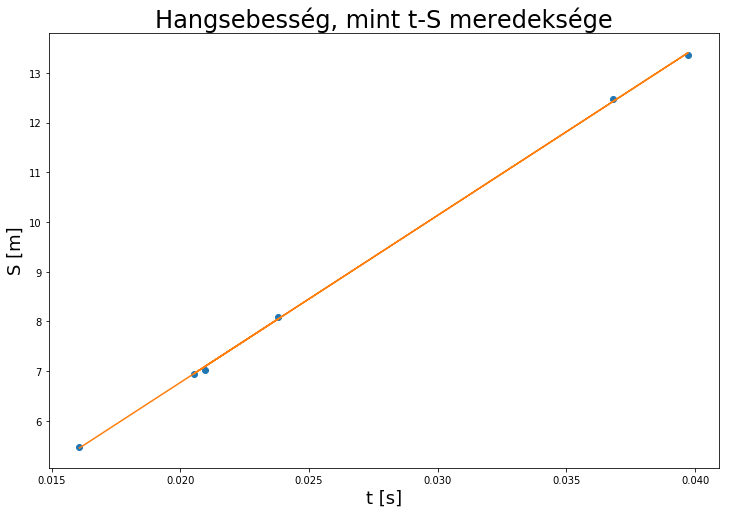

In [6]:
plt.figure(figsize=(12,8))
plt.plot(t,S,'o',label='adatpontok')
plt.plot(t,lin(t,*popt),label='illesztes')
plt.title('Hangsebesség, mint t-S meredeksége',fontsize=24)
plt.xlabel("t [s]",fontsize=18)
plt.ylabel("S [m]",fontsize=18)

Az illesztett modell paramétereiből határozza meg a rendszer késleltetését és a hangsebességet.
* Az illesztett modell egyenlete: S=a*t+b
* A hangsebesség értéke:336.1092 m/s
* A rendszer késleltetése:0.15 ms

In [7]:
v=a
dv=da
t_k=b/a
dt_k=(a*db+b*da)/a**2
print("Hangsebesség: v={} m/s, hibája dv={} m/s".format(v,dv))
print("Késleltetés: t_k={} ms, hibája: dt_k={} ms".format(1000*t_k,1000*dt_k))

Hangsebesség: v=336.1091895254914 m/s, hibája dv=2.7066413371065337 m/s
Késleltetés: t_k=0.1543800738116425 ms, hibája: dt_k=0.22467288969140767 ms


## 3. A visszavert jel intenzitásának szögfüggése - 4 pont

Válasszon ki egy jól visszaverő közeli falfelületet. 
A léptetőmotort egyenként léptetve, tapogassa le a falat. 
Egy-egy rögzített irányban a mérés bizonytalansága nagy, akár 20-30%-t is szór csiripenként az amplitudó maximuma a keverőjel fázisától függően. 
*Javaslat:* érdemes tehát mindegyik irányban megnézni, hogy több visszaverődés közül mekkora a jel legnagyobb értéke.

Illesszen az adatokra egy arra alkalmas függvényt!

In [8]:
def beolv(nev,db):
    '''.wav file beolvasás listába, nev feladat alapján, sorszám 1-től '''
    lista=[]
    for i in range(db):
        fs,data=wavfile.read('{}{}.wav'.format(nev,i+1))
        lista.append([fs,data])
    return lista

In [9]:
wavlist=beolv("intenzitas(3)/int",30)

In [10]:
len(wavlist)

30

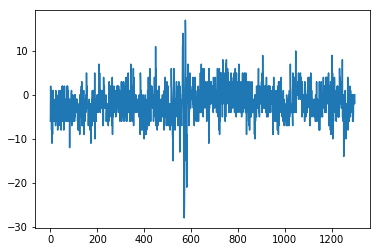

In [11]:
plt.plot(wavlist[20][1][3500:4800,1])

In [12]:
jel=wavlist[20][1][4050:4110,1]

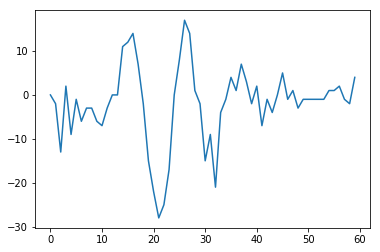

In [13]:
plt.plot(jel)

In [14]:
sum((jel-jel.mean())**2)/len(jel)

76.84749999999995

In [15]:
j0=jel-jel.mean()
.5*(j0.max() -j0.min())

22.5

In [16]:
i=20

In [17]:
wavlist[i][1].index(max[wavlist[i,1]])

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [18]:
wavlist[i][1][:,1]

array([-5,  3, -6, ..., -2, -5, -6], dtype=int16)

In [19]:
max(wavlist[i][1][:,1])

5155

In [20]:
a=(np.where(wavlist[i][1][:,1] == max(wavlist[i][1][:,1])))[0][0]
b=1500
c=a+b

In [ ]:
d=(np.where(wavlist[i][1][:,1] == max(wavlist[i][1][:,1])))[0][0]

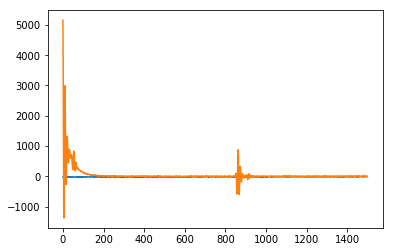

In [23]:
plt.plot(wavlist[i][1][a:c])

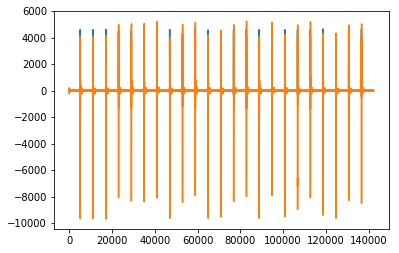

In [22]:
plt.plot(wavlist[15][1])

|Mérés száma | Elfordulás | Amplitúdó |
|:-:|-:|-:|
|1  |  |  |
|2  |  |  |
|3  |  |  |
|4  |  |  |
|5  |  |  |
|6  |  |  |
|7  |  |  |
|8  |  |  |
|9  |  |  |
|10 |  |  |
|11 |  |  |

In [ ]:
# ábrázolás és illesztés

* Az illesztett modell egyenlete:
* Az illesztés paramétereinek értéke:
* Ebből a szögfelbontás becsült értéke:

## 4. A csirip spektrumának vizsgálata - 5 pont

A rögzített adatokból emelje ki egy visszavert jel hullámcsomagját és végezze el a Fourier-transzformációját. 
A hullámcsomag Fourier-spektruma jellegzetes maximummal rendelkezik.
Mekkora frekvenciánál van ez a maximum, és mekkora a jel sávszélessége.
*Megjegyzés:* sávszélesség alatt a maximumhoz képest -3 dB esést felölelő tartományt értjük.

* A spektrum maximuma, $f=$
* Az alsó sávhatár, $f_\mathrm{min}=$
* A felső sávhatár, $f_\mathrm{max}=$
* A jel sávszélessége, $C=$

Hogyan tudna több visszavert hullámcsomagból pontosabb eredményre jutni?


## 5. Speciális szórócentrumok visszaverőképességének vizsgálata - 3 pont

Mérje meg három kiválasztott visszaverő objektum -- gömb, sík (0$^\circ$ és 45$^\circ$), saroktükör, érdes felület -- relatív visszaverőképességét.
Tekintse egységnyinek a 90$^\circ$ álló síkfelületet (maximális visszaverőképesség). 

**A vizsgált szórócentrumok relatív visszaverőképessége**

Hogyan korrigálhatja a fenti számokat, ha nem egyforma távol helyezte el a visszaverő felületeket?

**Válasz helye.**

## 6. A terem alaprajzának analízise - 6 pont

Rögzítse a mintasorozatot, miközben az ultrahang radar legalább egy teljes kört jár be. 

Készítsen `python` eljárást, amellyel a terem alaprajza elkészíthető a hangfájlba rögzített adatokra támaszkodva.

In [ ]:
# eljárás helye

In [ ]:
# alaprajzábra